In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from submission.source.helpers import load_data
from submission.source.constants import COLUMN_TYPES

In [2]:
sns.set_style()

In [3]:
%load_ext autoreload
%autoreload 2

## Load data

In [4]:
df = load_data()

Loading dataset...
Dataset has been loaded! Shape: (1000, 22)


## Exploratory data analysis

In [5]:
df.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_employment_since,installment_as_income_perc,sex,...,present_residence_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,Not default,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,Default,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,Not default,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,Not default,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,Default,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [6]:
df.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_employment_since', 'installment_as_income_perc', 'sex',
       'personal_status', 'other_debtors', 'present_residence_since',
       'property', 'age', 'other_installment_plans', 'housing',
       'credits_this_bank', 'job', 'people_under_maintenance', 'telephone',
       'foreign_worker'],
      dtype='object')

In [7]:
df.dtypes

default                       object
account_check_status          object
duration_in_month              int64
credit_history                object
purpose                       object
credit_amount                  int64
savings                       object
present_employment_since      object
installment_as_income_perc     int64
sex                           object
personal_status               object
other_debtors                 object
present_residence_since        int64
property                      object
age                            int64
other_installment_plans       object
housing                       object
credits_this_bank              int64
job                           object
people_under_maintenance       int64
telephone                     object
foreign_worker                object
dtype: object

In [8]:
df_numerical = df.select_dtypes(include=[int])
df_categorical = df.select_dtypes(include=[object]).drop(columns="default")

In [21]:
df_numerical.describe()

,duration_in_month,credit_amount,installment_as_income_perc,present_residence_since,age,credits_this_bank,people_under_maintenance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [306]:
df_categorical.describe()

,account_check_status,credit_history,purpose,savings,present_employment_since,sex,personal_status,other_debtors,property,other_installment_plans,housing,job,telephone,foreign_worker
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,2,3,3,4,3,3,4,2,2
top,no checking account,existing credits paid back duly till now,domestic appliances,... < 100 DM,1 <= ... < 4 years,male,single,none,"if not A121/A122 : car or other, not in attrib...",none,own,skilled employee / official,none,yes
freq,394,530,280,603,339,690,548,907,332,814,713,630,596,963


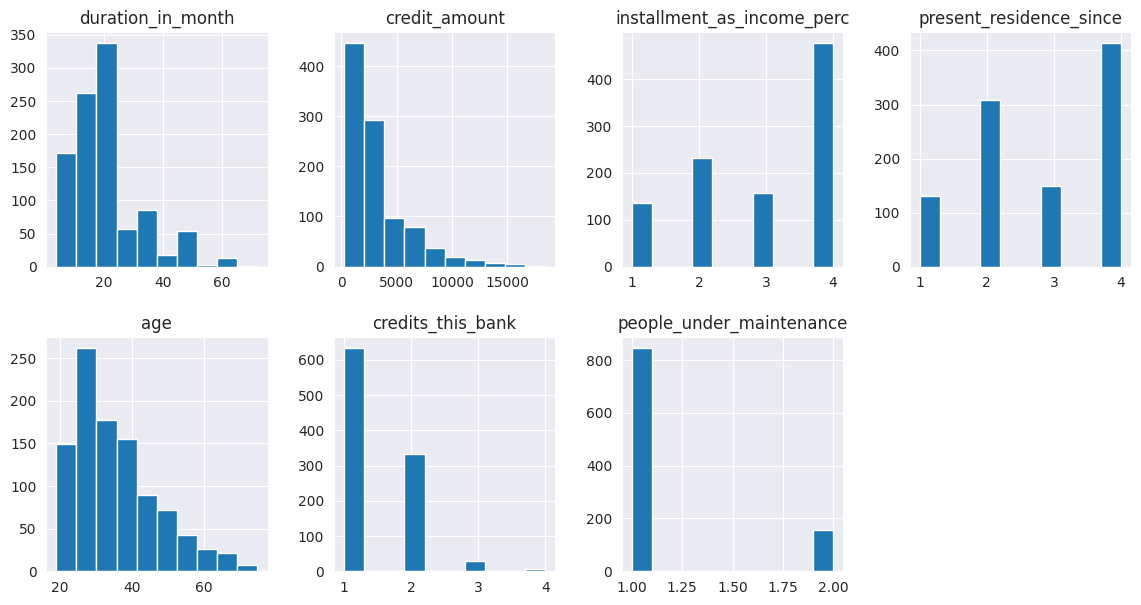

In [307]:
df_numerical.hist(figsize=(14, 7), layout=(2, 4))
plt.show()

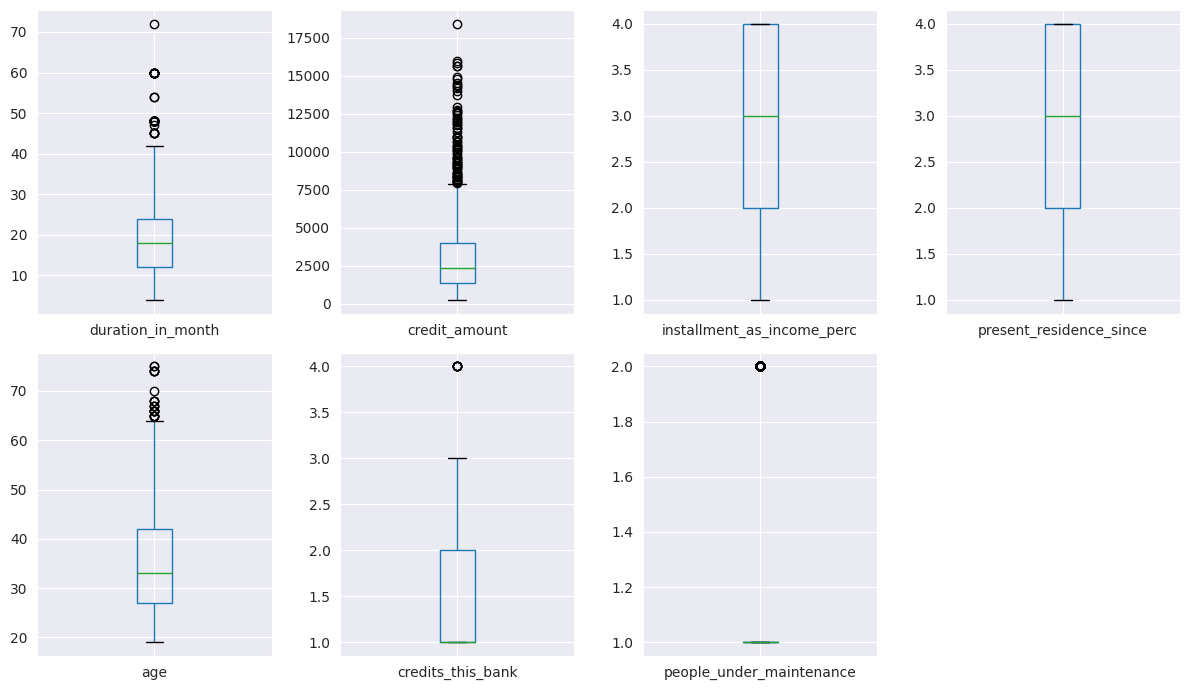

In [308]:
fig, axes = plt.subplots(2, 4, figsize=(12, 7))
for idx, column in enumerate(df_numerical.columns):
    df_numerical.boxplot(column, ax=axes.flatten()[idx])

fig.delaxes(axes[1, 3])
plt.tight_layout()
plt.show()

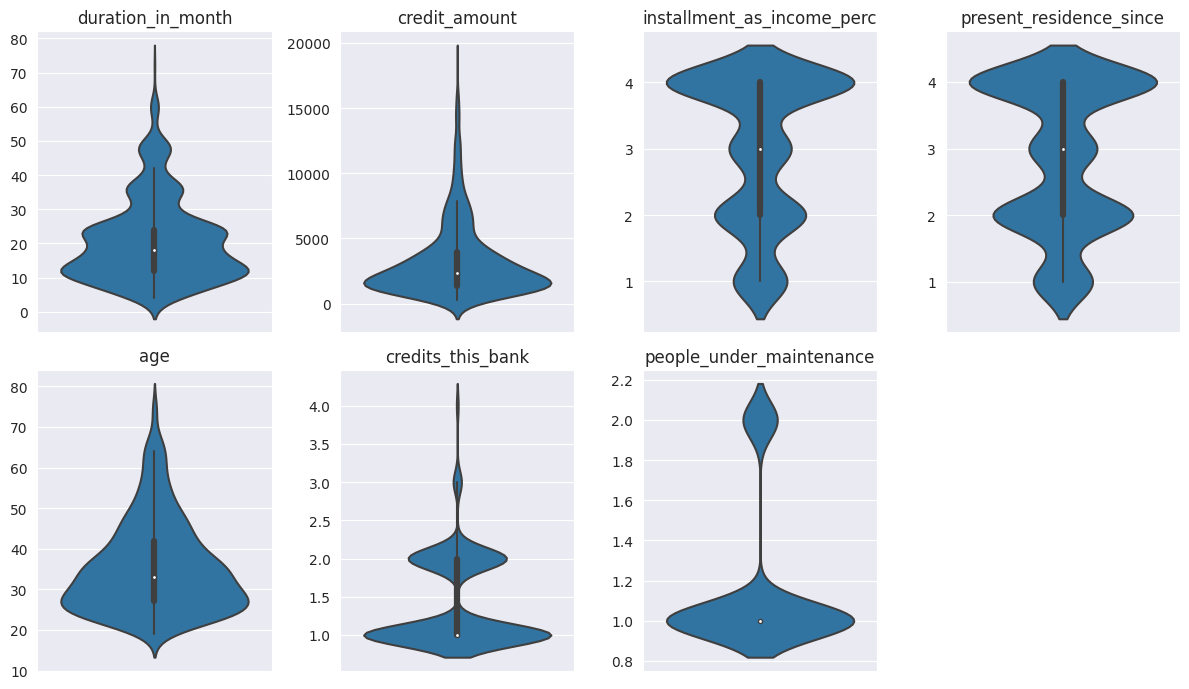

In [309]:
fig, axes = plt.subplots(2, 4, figsize=(12, 7))
for idx, column in enumerate(df_numerical.columns):
    ax = sns.violinplot(y=column, data=df_numerical, ax=axes.flatten()[idx])
    ax.set(xlabel="", ylabel="", title=column)

fig.delaxes(axes[1, 3])
plt.tight_layout()
plt.show()

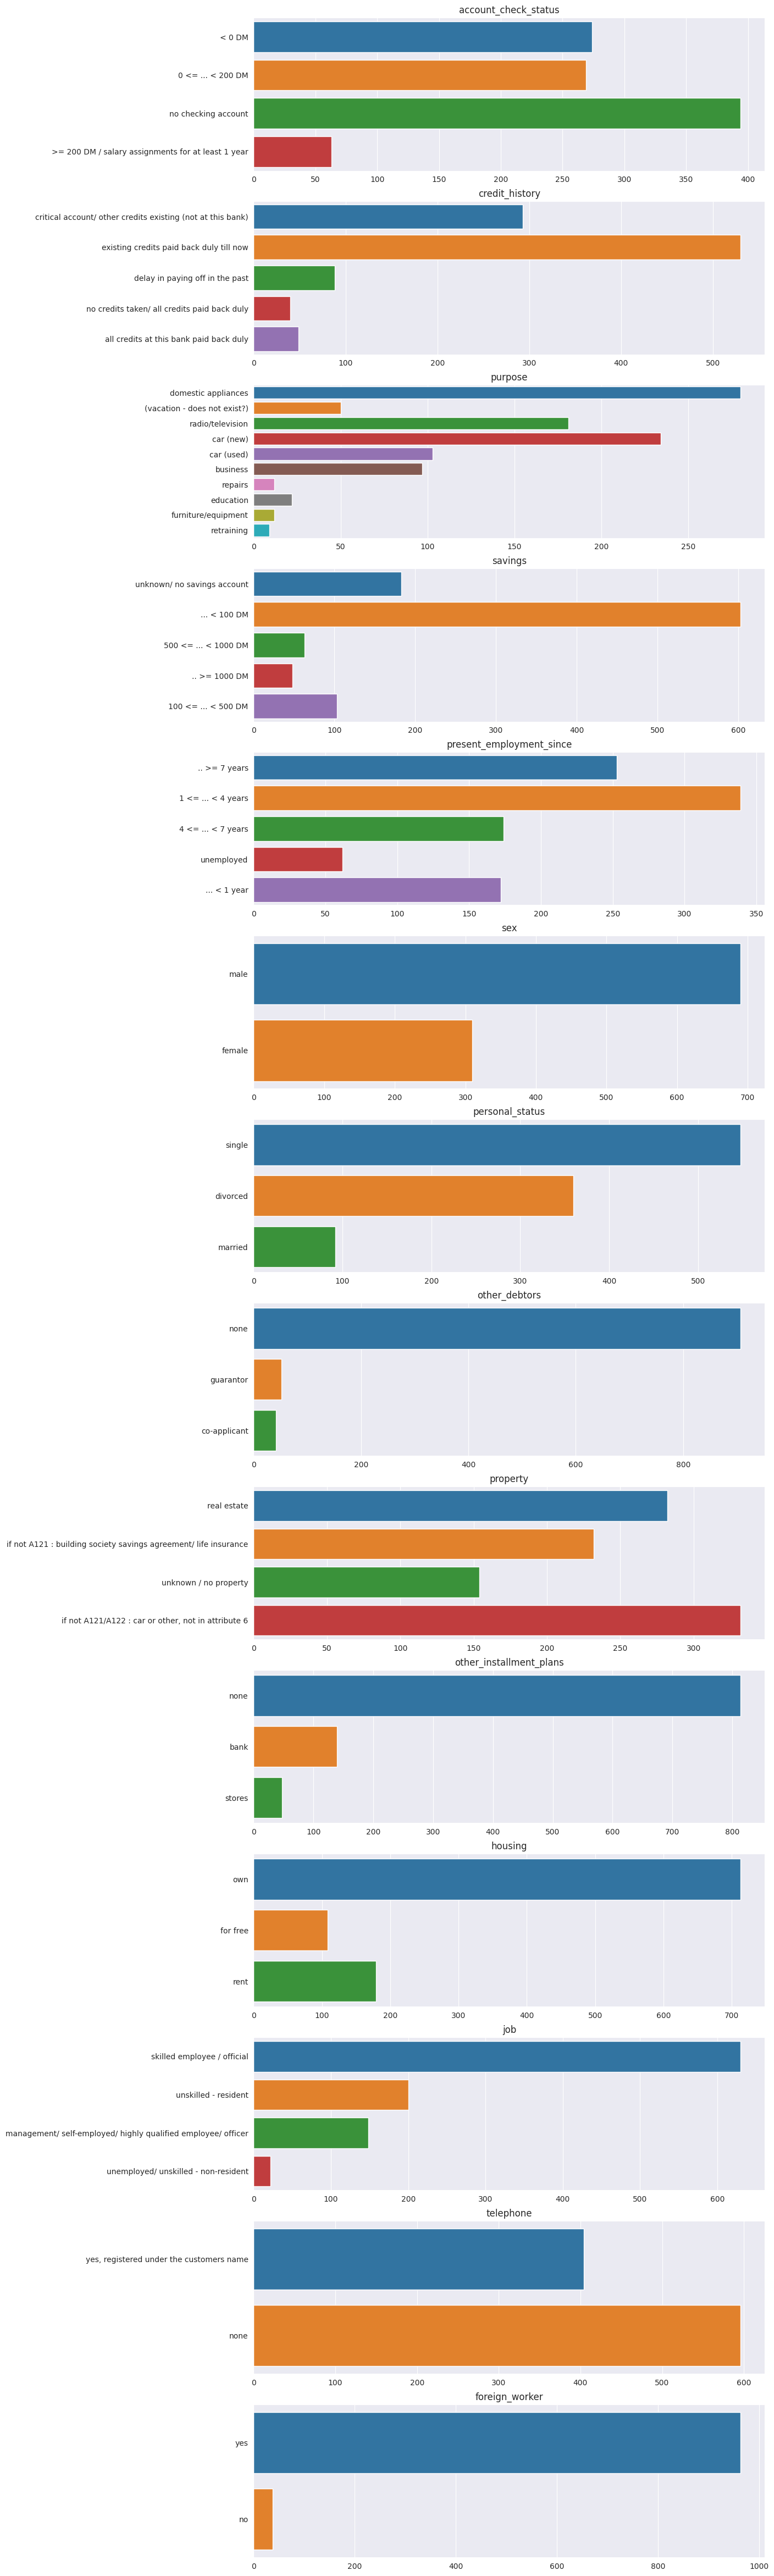

In [310]:
fig, axes = plt.subplots(14, 1, figsize=(12, 60))
for idx, column in enumerate(df_categorical.columns):
    ax = sns.countplot(y=column, data=df_categorical, ax=axes.flatten()[idx])
    ax.set_yticklabels(ax.get_yticklabels())
    ax.set(xlabel="", ylabel="", title=column)


# plt.tight_layout()
plt.show()

<Axes: xlabel='default', ylabel='count'>

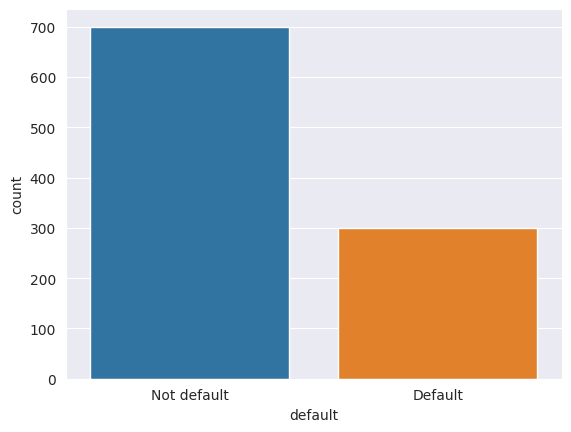

In [311]:
sns.countplot(data=df, x="default")

## PCA

In [6]:
feature_types = {i:COLUMN_TYPES[i] for i in COLUMN_TYPES if i!= 'default'}

columns_to_scale = [key for key in feature_types.keys() if feature_types[key]=="numeric"]
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

columns_to_encode = [key for key in feature_types.keys() if feature_types[key]=="category"]
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore',sparse=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, columns_to_scale),
    ('cat', categorical_transformer, columns_to_encode)
])

In [7]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=3))
])

In [8]:
components = pipeline.fit_transform(df)

In [10]:
fig = px.scatter_3d(components, x=0, y=1, z=2, color=df.default)
fig.show()

## T-SNE

In [22]:
from sklearn import model_selection

Y = df.default
X = df.drop(columns="default")
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.20, random_state=30, stratify=Y)

In [23]:
from sklearn.linear_model import LogisticRegression

# Pipeline for the model Logistic Regression
clf_logistic_regression = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression(max_iter=1000))])

# Fit and score your model
clf_logistic_regression.fit(X_train, Y_train)
clf_logistic_regression.score(X_test, Y_test)

0.755

In [ ]:
X_train.account_check_status.value_counts()

In [ ]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', TSNE(n_components=2, init='pca', learning_rate='auto'))
])

x_train_components = pipeline.fit_transform(X_train)

In [ ]:
fig = px.scatter(x_train_components, x=0, y=1, color=X_train.people_under_maintenance)
fig.show()

In [ ]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', TSNE(n_components=2, init='pca', learning_rate='auto'))
])

x_test_components = pipeline.fit_transform(X_test)

In [ ]:
fig = px.scatter(x_test_components, x=0, y=1, color=X_test.people_under_maintenance)
fig.show()

In [ ]:
mapper = {0.: "Correct", 1.: "Incorrect"}
errors = (clf_logistic_regression.predict(X_test) != Y_test).apply(lambda x: mapper[x])

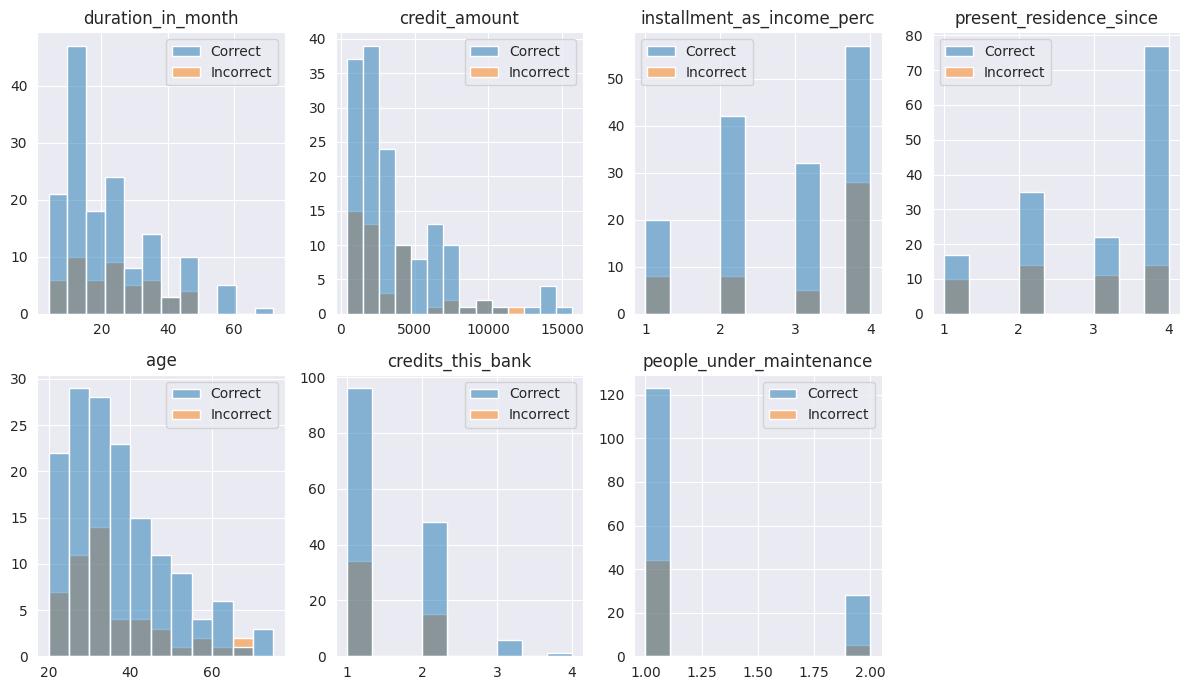

In [290]:
plt.show()
fig, axes = plt.subplots(2, 4, figsize=(12, 7))

for idx, column in enumerate(X_test.select_dtypes(int).columns):
    ax = sns.histplot(x=column, data=X_test, hue=errors.values,  ax=axes.flatten()[idx], stat="count", common_norm=True)
    ax.set(xlabel="", ylabel="", title=column)

fig.delaxes(axes[1, 3])
plt.tight_layout()
plt.show()

In [ ]:
plt.show()
fig, axes = plt.subplots(2, 4, figsize=(12, 7))

for idx, column in enumerate(X_test.select_dtypes(int).columns):
    ax = sns.histplot(x=column, data=X_test, hue=Y_test,  ax=axes.flatten()[idx], stat="probability", common_norm=True)
    ax.set(xlabel="", ylabel="", title=column)

fig.delaxes(axes[1, 3])
plt.tight_layout()
plt.show()

[autoreload of sklearn.utils.fixes failed: Traceback (most recent call last):
  File "/home/nikita/PycharmProjects/GisardTechExercise/.venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/nikita/PycharmProjects/GisardTechExercise/.venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/home/nikita/PycharmProjects/GisardTechExercise/.venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/home/nikita/PycharmProjects/GisardTechExercise/.venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 266, in update_function
    setattr(old, name, getattr(new, name))
ValueError: delayed() requires a code object with 2 free vars, not 0
]
[autoreload of sklearn.base failed: Traceback (most recent call last):
  File "/home/nikita/PycharmProje

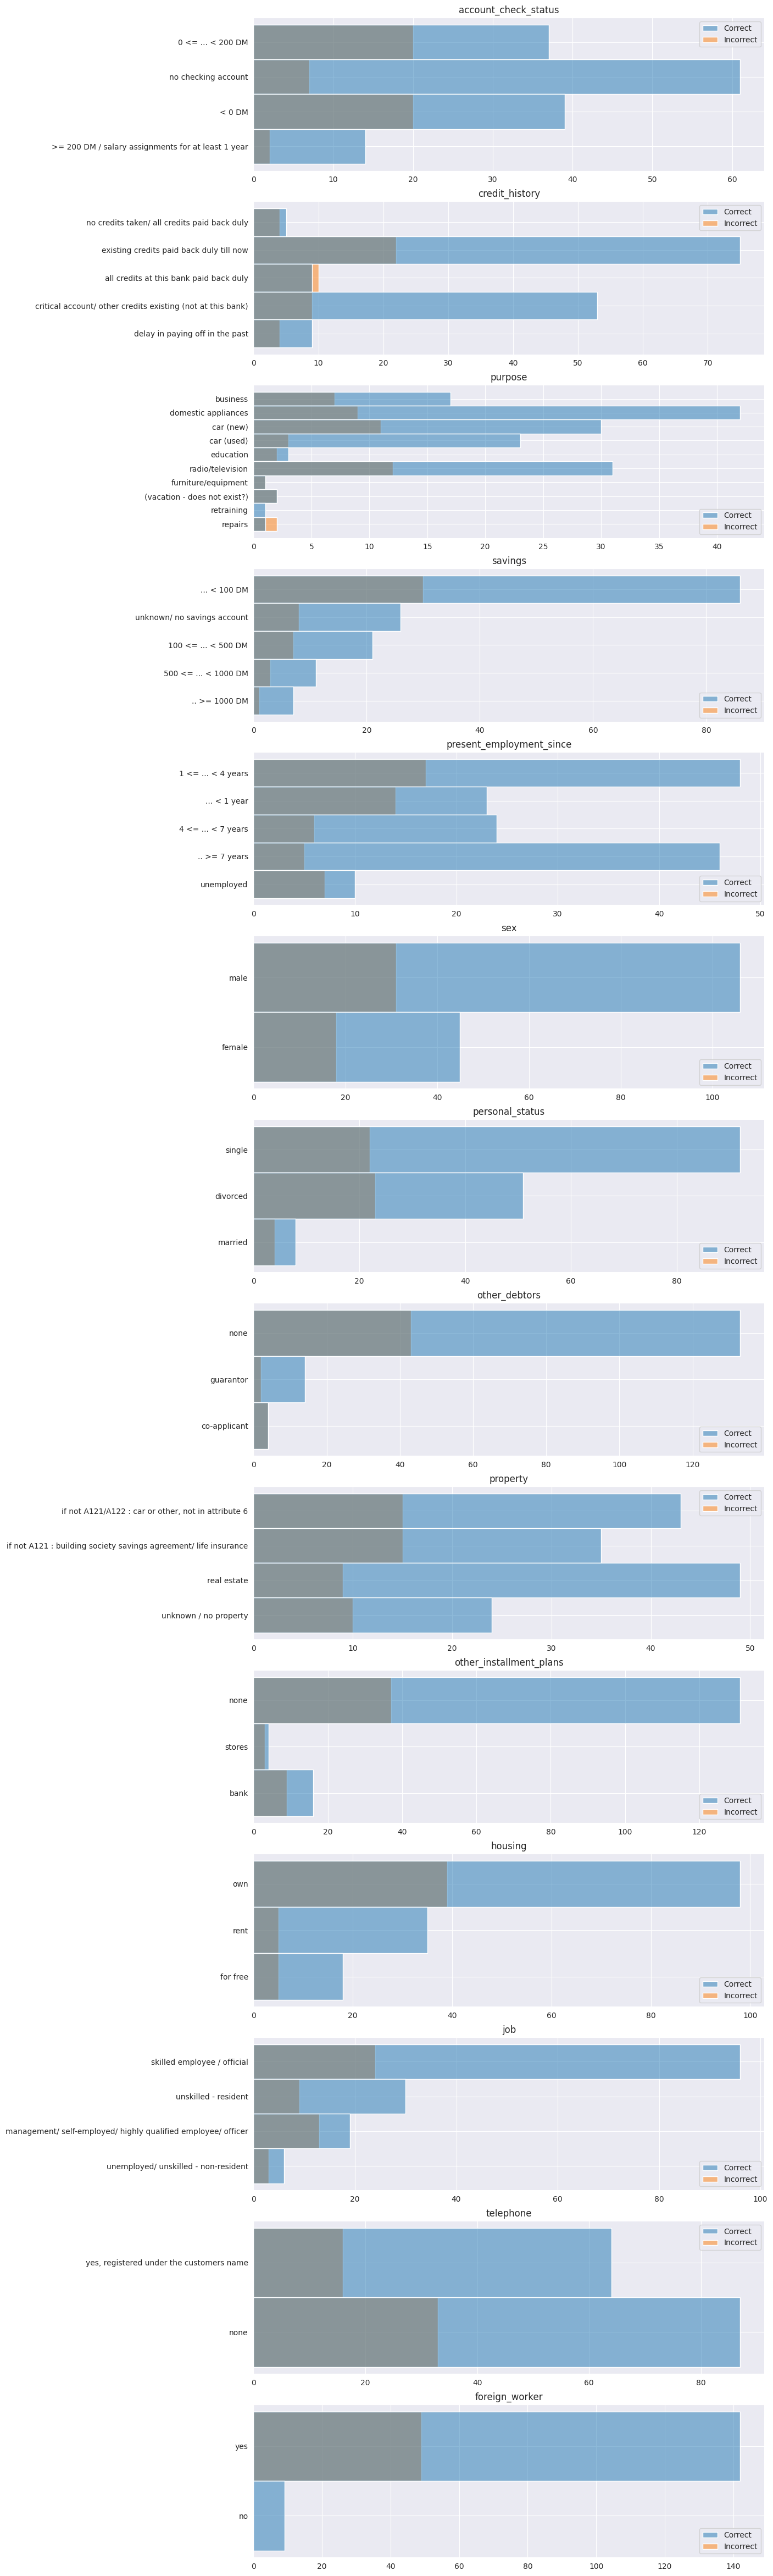

In [312]:
fig, axes = plt.subplots(14, 1, figsize=(12, 60))
for idx, column in enumerate(X_test.select_dtypes(object).columns):
    ax = sns.histplot(y=column, data=X_test, hue=errors.values, ax=axes.flatten()[idx], stat="count", common_norm=True)
    ax.set_yticklabels(ax.get_yticklabels())
    ax.set(xlabel="", ylabel="", title=column)


# plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(14, 1, figsize=(12, 60))
for idx, column in enumerate(X_test.select_dtypes(object).columns):
    ax = sns.histplot(y=column, data=X_test, hue=Y_test, ax=axes.flatten()[idx], stat="probability", common_norm=True)
    ax.set_yticklabels(ax.get_yticklabels())
    ax.set(xlabel="", ylabel="", title=column)


# plt.tight_layout()
plt.show()

In [296]:
X_test.installment_as_income_perc.unique()

array([2, 4, 1, 3])

## UMAP

In [24]:
import umap

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('umap', umap.UMAP(n_components=2, n_jobs=-1))
])

In [25]:
umap_components = pipeline.fit_transform(X_train)

In [26]:
fig = px.scatter(umap_components, x=0, y=1, color=Y_train)
fig.show()

In [27]:
umap_components = pipeline.fit_transform(X_test)

In [28]:
fig = px.scatter(umap_components, x=0, y=1, color=Y_test)
fig.show()

In [13]:
df_categorical.purpose.unique()

array(['domestic appliances', '(vacation - does not exist?)',
       'radio/television', 'car (new)', 'car (used)', 'business',
       'repairs', 'education', 'furniture/equipment', 'retraining'],
      dtype=object)